In [1]:
from numpy import*
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import pandas as pd
%matplotlib inline

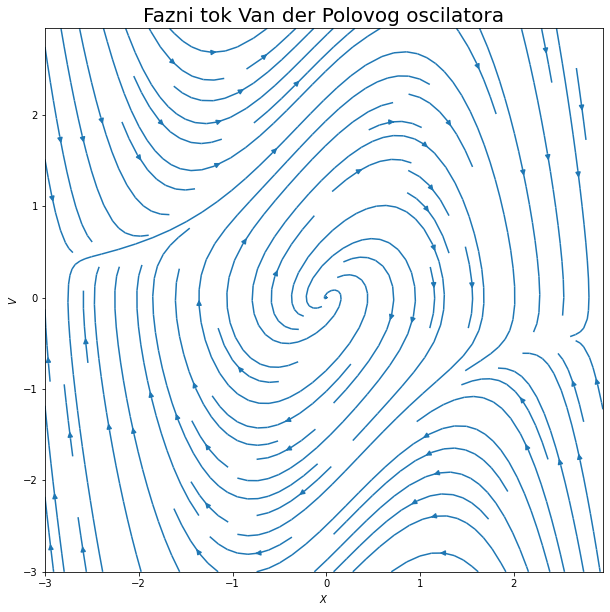

In [2]:
#Korisne funkcije
def van_der_pol(state,t,mu = 100):
    """Generira diferencijalnu jednadžbu"""
    x = state[0]
    dx = state[1]
    d2x = -x  + mu*( 1 - x**2 )*dx
    
    return array([dx,d2x])
dt = 0.01   

def vector_field(x,dx,dt = dt,mu = 1):
    
    ux = dx
    uy = -x + mu*(1 - x**2)*dx
    return ux,uy


x_mesh = arange(-3,3,5e-2)
y_mesh = arange(-3,3,5e-2)
Npts = len(x_mesh)
u = zeros([Npts,Npts])
v = zeros([Npts,Npts])

for i in range(Npts):
    for j in range(Npts):
        u[j,i],v[j,i] = vector_field(x_mesh[i],y_mesh[j])

        
X,Y = meshgrid(x_mesh,y_mesh) 
frame,fig =plt.subplots(figsize = (10,10))
fig.streamplot(x_mesh,y_mesh,u,v)
# q = fig.quiver(X[::5,::5],Y[::5,::5],u[::5,::5],v[::5,::5],units = "width",color = "blue",label ="fazni tok")
# qk = fig.quiverkey(q, 0.9, 0.9, 2,label = "")
#fig.legend()
fig.set_title("Fazni tok Van der Polovog oscilatora",fontsize = 20)
fig.set_xlabel(r"$X$")
fig.set_ylabel(r"$V$")
print()

In [3]:
#Definiranje modela
#Najbolja arhietktura 2x8x8x2
model= keras.Sequential([layers.BatchNormalization(input_shape = [2]),
                        layers.Dense(8,activation = "swish"),
                        layers.BatchNormalization(),
                        #layers.Dropout(rate = 0.1),
                        
#                         layers.Dense(5,activation = "swish"),
#                         layers.BatchNormalization(),
#                         #layers.Dropout(rate =0.05 ),
                          
#                         layers.Dense(8,activation = "swish"),
#                         layers.BatchNormalization(),
#                          layers.Dropout(rate = 0.1),
                         
#                         layers.Dense(8,activation = "swish"),
#                         layers.BatchNormalization(),
#                         layers.Dropout(rate = 0.1),
                         
#                         layers.Dense(8,activation = "swish"),
#                         layers.BatchNormalization(),
#                         layers.Dropout(rate = 0.1),
                       
                        layers.Dense(8,activation = "swish"),
                        layers.BatchNormalization(),
                        #layers.Dropout(rate = 0.1),
                        layers.Dense(2)])

#Optimizaciski algoritam
opt =keras.optimizers.Adam(
    learning_rate=0.002)
#mse - Mean square error - to želiš minimizirati
model.compile(optimizer = opt,
               loss = 'mse')


In [4]:
#Generiranje podataka za učenje modela
#Za provjeru i za testiranje modela

Ntrain = 600 #Originalno 600
trainX =  random.uniform(-3,3,(Ntrain,2))
trainY = list()

Ntest = 300
testX =  random.uniform(-3,3,(Ntest,2))
testY = list()

Nvalid = 300
validX =  random.uniform(-3,3,(Nvalid,2))
validY = list()

for i in range(Ntrain):
    trainY.append(vector_field(trainX[i][0],trainX[i][1]))    
for i in range(Ntest):
    testY.append(vector_field(testX[i][0],testX[i][1]))
for i in range(Nvalid):
    validY.append(vector_field(validX[i][0],validX[i][1]))
trainY = array(trainY)
testY = array(testY)
validY = array(validY)

In [5]:
#Treniranje modela
history = model.fit(trainX,trainY,
                   validation_data=(validX,validY),
                    batch_size = 64,
                    epochs = 500
                   )

Epoch 1/500
10/10 [==============================] - 1s 44ms/step - loss: 16.1406 - val_loss: 21.2751
Epoch 2/500
10/10 [==============================] - 0s 6ms/step - loss: 14.3924 - val_loss: 20.9753
Epoch 3/500
10/10 [==============================] - 0s 5ms/step - loss: 13.8544 - val_loss: 20.6721
Epoch 4/500
10/10 [==============================] - 0s 5ms/step - loss: 14.7462 - val_loss: 20.3247
Epoch 5/500
10/10 [==============================] - 0s 5ms/step - loss: 13.1824 - val_loss: 20.1756
Epoch 6/500
10/10 [==============================] - 0s 5ms/step - loss: 13.5915 - val_loss: 19.9605
Epoch 7/500
10/10 [==============================] - 0s 5ms/step - loss: 11.4939 - val_loss: 19.7194
Epoch 8/500
10/10 [==============================] - 0s 7ms/step - loss: 11.1340 - val_loss: 19.5331
Epoch 9/500
10/10 [==============================] - 0s 8ms/step - loss: 10.6112 - val_loss: 19.3770
Epoch 10/500
10/10 [==============================] - 0s 7ms/step - loss: 10.4403 - val_lo

10/10 [==============================] - 0s 5ms/step - loss: 0.6726 - val_loss: 0.2117
Epoch 83/500
10/10 [==============================] - 0s 5ms/step - loss: 1.1601 - val_loss: 0.2788
Epoch 84/500
10/10 [==============================] - 0s 4ms/step - loss: 1.1067 - val_loss: 0.3348
Epoch 85/500
10/10 [==============================] - 0s 4ms/step - loss: 1.6250 - val_loss: 0.2705
Epoch 86/500
10/10 [==============================] - 0s 5ms/step - loss: 2.3688 - val_loss: 0.1789
Epoch 87/500
10/10 [==============================] - 0s 4ms/step - loss: 1.3541 - val_loss: 0.3047
Epoch 88/500
10/10 [==============================] - 0s 5ms/step - loss: 0.9533 - val_loss: 0.3105
Epoch 89/500
10/10 [==============================] - 0s 5ms/step - loss: 0.8550 - val_loss: 0.3756
Epoch 90/500
10/10 [==============================] - 0s 4ms/step - loss: 1.1799 - val_loss: 0.1861
Epoch 91/500
10/10 [==============================] - 0s 5ms/step - loss: 1.4545 - val_loss: 0.1985
Epoch 92/500


10/10 [==============================] - 0s 4ms/step - loss: 1.0079 - val_loss: 0.0896
Epoch 164/500
10/10 [==============================] - 0s 5ms/step - loss: 0.6309 - val_loss: 0.1499
Epoch 165/500
10/10 [==============================] - 0s 4ms/step - loss: 1.7401 - val_loss: 0.1289
Epoch 166/500
10/10 [==============================] - 0s 4ms/step - loss: 1.0753 - val_loss: 0.0795
Epoch 167/500
10/10 [==============================] - 0s 4ms/step - loss: 0.9114 - val_loss: 0.0880
Epoch 168/500
10/10 [==============================] - 0s 5ms/step - loss: 0.7999 - val_loss: 0.0699
Epoch 169/500
10/10 [==============================] - 0s 4ms/step - loss: 0.6290 - val_loss: 0.1349
Epoch 170/500
10/10 [==============================] - 0s 4ms/step - loss: 0.8757 - val_loss: 0.1069
Epoch 171/500
10/10 [==============================] - 0s 4ms/step - loss: 1.5135 - val_loss: 0.0969
Epoch 172/500
10/10 [==============================] - 0s 5ms/step - loss: 0.9525 - val_loss: 0.0691
Epoc

10/10 [==============================] - 0s 4ms/step - loss: 1.2565 - val_loss: 0.0978
Epoch 245/500
10/10 [==============================] - 0s 4ms/step - loss: 0.8154 - val_loss: 0.0912
Epoch 246/500
10/10 [==============================] - 0s 4ms/step - loss: 0.8032 - val_loss: 0.1587
Epoch 247/500
10/10 [==============================] - 0s 4ms/step - loss: 0.6950 - val_loss: 0.0901
Epoch 248/500
10/10 [==============================] - 0s 5ms/step - loss: 0.9886 - val_loss: 0.0896
Epoch 249/500
10/10 [==============================] - 0s 5ms/step - loss: 1.2473 - val_loss: 0.0950
Epoch 250/500
10/10 [==============================] - 0s 4ms/step - loss: 1.4301 - val_loss: 0.1183
Epoch 251/500
10/10 [==============================] - 0s 4ms/step - loss: 0.8398 - val_loss: 0.1605
Epoch 252/500
10/10 [==============================] - 0s 4ms/step - loss: 0.8100 - val_loss: 0.1556
Epoch 253/500
10/10 [==============================] - 0s 5ms/step - loss: 0.4851 - val_loss: 0.1976
Epoc

10/10 [==============================] - 0s 5ms/step - loss: 1.4516 - val_loss: 0.2049
Epoch 326/500
10/10 [==============================] - 0s 5ms/step - loss: 1.1495 - val_loss: 0.1536
Epoch 327/500
10/10 [==============================] - 0s 5ms/step - loss: 1.5260 - val_loss: 0.0844
Epoch 328/500
10/10 [==============================] - 0s 5ms/step - loss: 0.8850 - val_loss: 0.1111
Epoch 329/500
10/10 [==============================] - 0s 4ms/step - loss: 0.9724 - val_loss: 0.1265
Epoch 330/500
10/10 [==============================] - 0s 4ms/step - loss: 0.7617 - val_loss: 0.1180
Epoch 331/500
10/10 [==============================] - 0s 5ms/step - loss: 1.1871 - val_loss: 0.0795
Epoch 332/500
10/10 [==============================] - 0s 5ms/step - loss: 1.3731 - val_loss: 0.1954
Epoch 333/500
10/10 [==============================] - 0s 4ms/step - loss: 1.1949 - val_loss: 0.1353
Epoch 334/500
10/10 [==============================] - 0s 5ms/step - loss: 1.4936 - val_loss: 0.2012
Epoc

10/10 [==============================] - 0s 4ms/step - loss: 0.6095 - val_loss: 0.0685
Epoch 407/500
10/10 [==============================] - 0s 5ms/step - loss: 0.9364 - val_loss: 0.0892
Epoch 408/500
10/10 [==============================] - 0s 4ms/step - loss: 1.1942 - val_loss: 0.0484
Epoch 409/500
10/10 [==============================] - 0s 5ms/step - loss: 0.7947 - val_loss: 0.0477
Epoch 410/500
10/10 [==============================] - 0s 4ms/step - loss: 1.2338 - val_loss: 0.0407
Epoch 411/500
10/10 [==============================] - 0s 4ms/step - loss: 1.0624 - val_loss: 0.0611
Epoch 412/500
10/10 [==============================] - 0s 4ms/step - loss: 1.0230 - val_loss: 0.2029
Epoch 413/500
10/10 [==============================] - 0s 4ms/step - loss: 0.7827 - val_loss: 0.0623
Epoch 414/500
10/10 [==============================] - 0s 4ms/step - loss: 1.0755 - val_loss: 0.0335
Epoch 415/500
10/10 [==============================] - 0s 4ms/step - loss: 1.6907 - val_loss: 0.0523
Epoc

10/10 [==============================] - 0s 5ms/step - loss: 0.6648 - val_loss: 0.1717
Epoch 488/500
10/10 [==============================] - 0s 4ms/step - loss: 0.9244 - val_loss: 0.1354
Epoch 489/500
10/10 [==============================] - 0s 5ms/step - loss: 0.8444 - val_loss: 0.2623
Epoch 490/500
10/10 [==============================] - 0s 5ms/step - loss: 1.1277 - val_loss: 0.1168
Epoch 491/500
10/10 [==============================] - 0s 5ms/step - loss: 0.6813 - val_loss: 0.1375
Epoch 492/500
10/10 [==============================] - 0s 5ms/step - loss: 1.0009 - val_loss: 0.0667
Epoch 493/500
10/10 [==============================] - 0s 5ms/step - loss: 0.7332 - val_loss: 0.1108
Epoch 494/500
10/10 [==============================] - 0s 5ms/step - loss: 1.2949 - val_loss: 0.0536
Epoch 495/500
10/10 [==============================] - 0s 5ms/step - loss: 0.8357 - val_loss: 0.0982
Epoch 496/500
10/10 [==============================] - 0s 5ms/step - loss: 1.3253 - val_loss: 0.0633
Epoc

10/10 [==============================] - 0s 666us/step - loss: 0.0662


0.06622765958309174

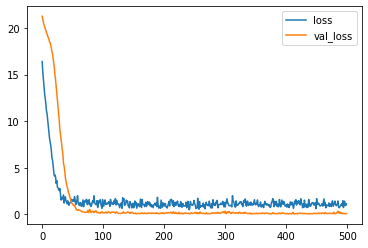

In [6]:
#Točnost modela
history_df = pd.DataFrame(history.history)
history_df.loc[:,['loss','val_loss']].plot()
model.evaluate(testX,testY)

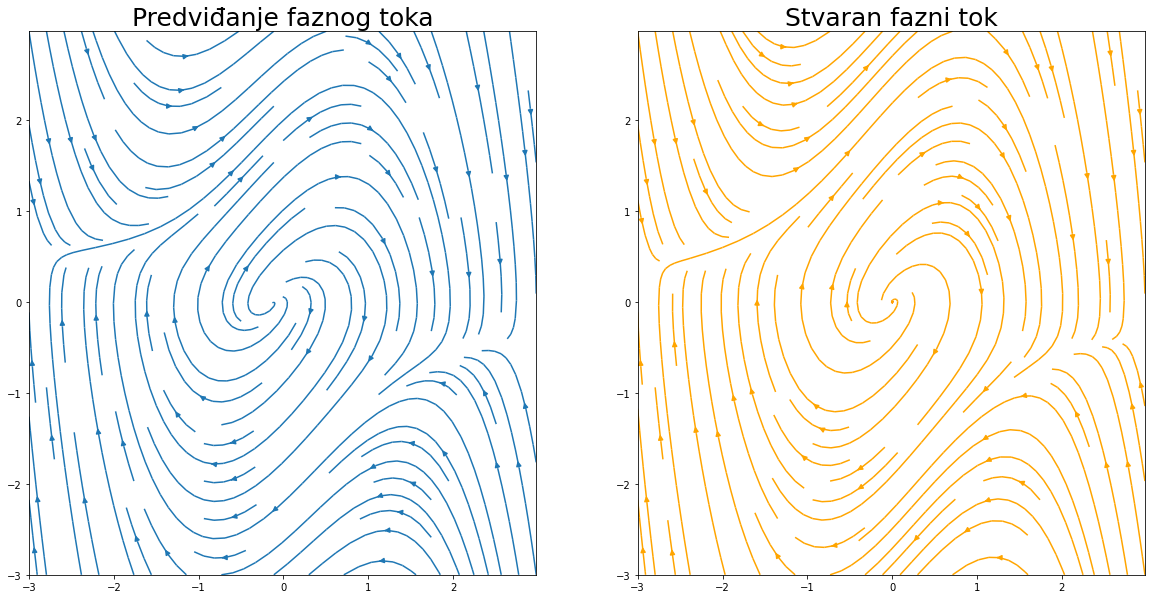

In [7]:
#Provjera kako model radi na nasumično odabranim točkama
#Cilj mu je pogoditi fazni tok u točku odnosno diferencijanu jednadžbu
x_mesh = arange(-3,3,6/300)
y_mesh = arange(-3,3,6/300)
u = zeros((len(x_mesh),len(x_mesh)))
v = zeros((len(x_mesh),len(x_mesh)))

data =[]
for i in range(len(x_mesh)):
    for j in range(len(y_mesh)):
        data.append([x_mesh[j],y_mesh[i]])   
        
        
data = array(data)
pred = model.predict(data)
pred =pred.reshape(300,300,2)


for i in range(len(x_mesh)):
    for j in range(len(y_mesh)):
        u[j,i],v[j,i] = vector_field(x_mesh[i],y_mesh[j])


frame,fig = plt.subplots(1,2,figsize = (20,10))
fig[0].streamplot(x_mesh,y_mesh,pred[:,:,0],pred[:,:,1],density = 1)
fig[1].streamplot(x_mesh,y_mesh,u,v,density = 1,color ="orange")
fig[0].set_title("Predviđanje faznog toka",fontsize = 25)
fig[1].set_title("Stvaran fazni tok",fontsize = 25)
print()

Text(0.5, 1.0, 'Preklopljena slika')

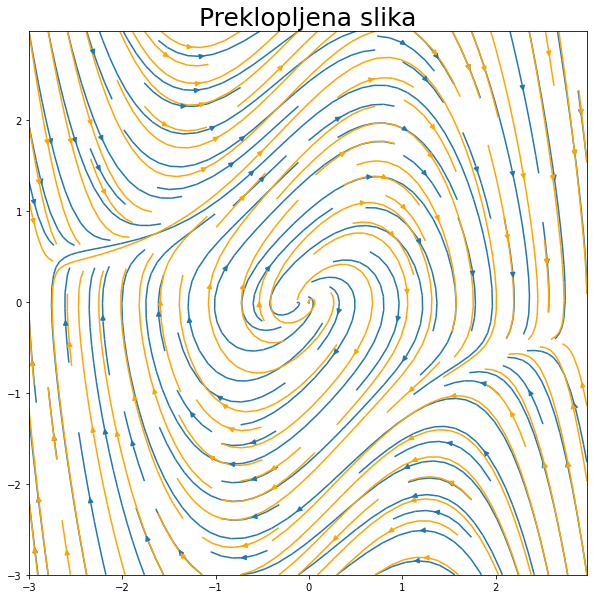

In [8]:
frame,fig = plt.subplots(figsize = (10,10))
dns = 1
fig.streamplot(x_mesh,y_mesh,pred[:,:,0],pred[:,:,1],density = dns)
fig.streamplot(x_mesh,y_mesh,u,v,density = dns,color ="orange")
fig.set_title("Preklopljena slika",fontsize = 25)

Text(0.5, 1.0, 'Fazne sile - predviđanje')

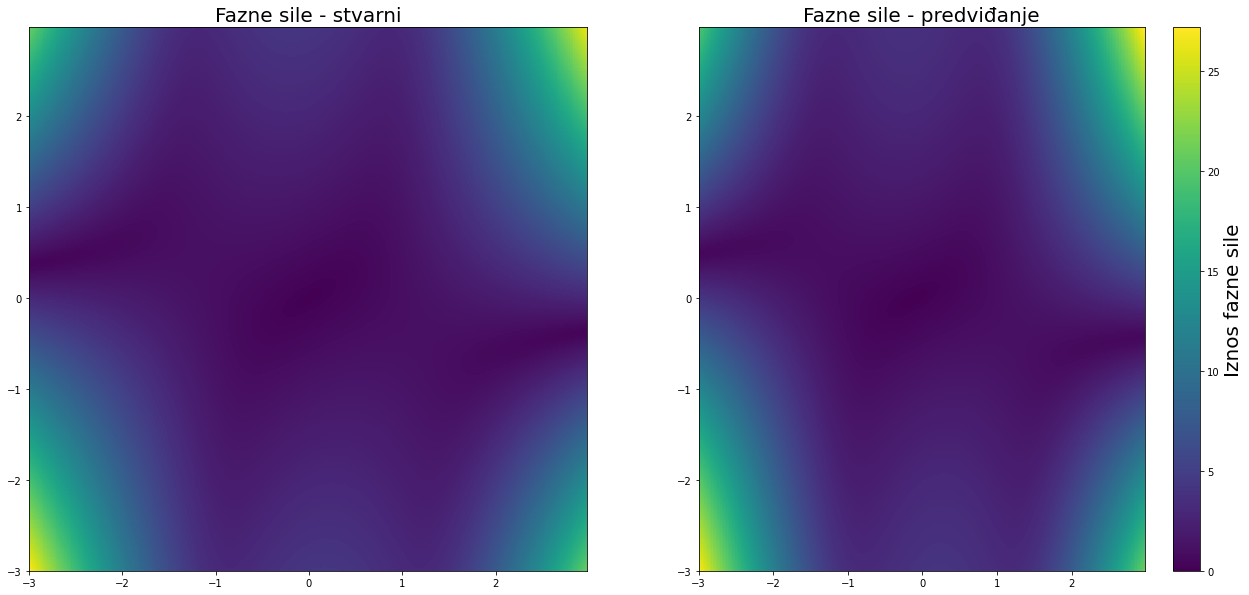

In [17]:
size_real = zeros((300,300))
size_neural = zeros((300,300))

for i in range(300):
    for j in range(300):
        size_real[j,i] = sqrt(u[j,i]**2 + v[j,i]**2)
        size_neural[j,i] = sqrt(pred[j,i,0]**2 + pred[j,i,1]**2)
        
X,Y = meshgrid(x_mesh,y_mesh)
frame,fig =plt.subplots(1,2,figsize =(22,10))
mp = fig[0].pcolor(X,Y,size_real)
fig[1].pcolor(X,Y,size_neural)
cs = frame.colorbar(mp,cmap='jet')
cs.set_label('Iznos fazne sile',size=20)
fig[0].set_title("Fazne sile - stvarni",fontsize =20)
fig[1].set_title("Fazne sile - predviđanje",fontsize =20)

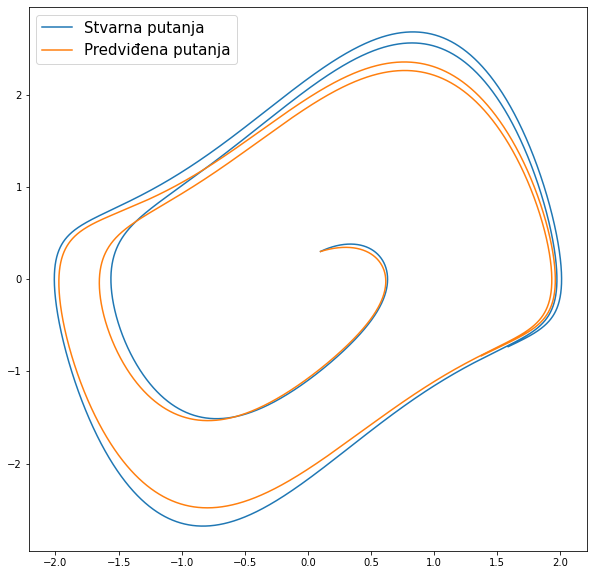

In [10]:
x = 0.1
y = 0.3
X,Y = [],[]
xpred,ypred = x,y
Xpred,Ypred  = [],[]
dt = 0.001
for i in range(15_000):
    F = vector_field(x,y)
    x += F[0]*dt
    y += F[1]*dt
    FN = model(array([xpred,ypred]).reshape(1,2),training=False).numpy()
    xpred += FN[0][0]*dt
    ypred += FN[0][1]*dt
    X.append(x)
    Y.append(y)
    Xpred.append(xpred)
    Ypred.append(ypred)

    
frame,fig = plt.subplots(figsize = (10,10))    
fig.plot(X,Y,label = "Stvarna putanja")
fig.plot(Xpred,Ypred,label = "Predviđena putanja")
fig.legend(fontsize = 15)

In [11]:
#Učenje kontinuacije dinamike
# #Podatke uzima s jedne krivulje
# t = arange(0,10,1e-2)
# L = len(t)
# Npts = 500
# initial_train = [0.1,0.1]
# train_traj = odeint(van_der_pol,initial_train,t)
# X_train = train_traj[::int(L/Npts),:]
# #Y_train = zeros((Npts,2))


# initial_val = [0.2,0.2]
# val_traj = odeint(van_der_pol,initial_val,t)
# X_val = val_traj[::int(L/Npts),:]
# #Y_val = zeros((Npts,2))



# initial_test = [-0.21,0.15]
# test_traj = odeint(van_der_pol,initial_test,t)
# X_test = test_traj[::int(L/Npts),:]
# #Y_test = zeros((Npts,2))

# Y_train,Y_test,Y_val = [],[],[]

# for i in range(len(X_train)):
# #     Y_train[i,:] += vector_field(X_train[i,0],X_train[i,1])
# #     Y_val[i,:] += vector_field(X_val[i,0],X_val[i,1])
# #     Y_test[i,:] += vector_field(X_test[i,0],X_test[i,1])
#     Y_train.append(vector_field(X_train[i,0],X_train[i,1]))
#     Y_test.append(vector_field(X_test[i,0],X_test[i,1]))
#     Y_val.append(vector_field(X_val[i,0],X_val[i,1]))
    
# Y_train = array(Y_train)
# Y_test = array(Y_test)
# Y_val = array(Y_val)


In [12]:
# #Definiranje modela2 koji predviđa trajektoriju u naprijed
# model2= keras.Sequential([layers.BatchNormalization(input_shape = [2]),
#                         layers.Dense(8,activation = "swish"),
#                         layers.BatchNormalization(),
#                         layers.Dropout(rate = 0.05),
                        
# #                         layers.Dense(10,activation = "swish"),
# #                         layers.BatchNormalization(),
# #                          layers.Dropout(rate =0.05 ),
                          
#                         layers.Dense(8,activation = "swish"),
#                         layers.BatchNormalization(),
#                       layers.Dropout(rate = 0.05),
                       
#                         layers.Dense(8,activation = "swish"),
#                         layers.BatchNormalization(),
#                         layers.Dropout(rate = 0.05),
#                         layers.Dense(2)])

# #Optimizaciski algoritam
# opt =keras.optimizers.Adam(
#     learning_rate=0.002)
# #mse - Mean square error - to želiš minimizirati
# model2.compile(optimizer = opt,
#                loss = 'mse')


# early_stopping = keras.callbacks.EarlyStopping(
#     min_delta=0.1, # minimium amount of change to count as an improvement
#     patience=100, # how many epochs to wait before stopping
#     restore_best_weights=True,
# )




In [13]:
# history2 = model2.fit(X_train,Y_train,
#                       validation_data = (X_val,Y_val),
#                       batch_size = 64,
#                       epochs = 500,
#                    callbacks =[early_stopping]
# )




In [14]:
# history_df2 = pd.DataFrame(history2.history)
# history_df2.loc[:,['loss','val_loss']].plot()

In [15]:
# x = 0.1
# y = 0.15
# X,Y = [x],[y]
# xpred = x
# ypred = y
# Xpred,Ypred =[x],[y]
# for i in range(500):
#     diff = vector_field(x,y)
#     x += diff[0]*dt
#     y += diff[1]*dt
#     #nerual = model2(array([xpred,ypred]).reshape(1,2)).numpy()
#     neural = model2.predict(array([xpred,ypred]).reshape(1,2))
#     xpred += neural[0][0]*dt
#     ypred += neural[0][1]*dt
#     Xpred.append(xpred)
#     Ypred.append(ypred)
#     X.append(x)
#     Y.append(y)
    
# plt.plot(X,Y)
# plt.plot(Xpred,Ypred)